# Example: 2D Simulation

## Set up Julia environment

In [1]:
import Pkg
Pkg.activate(mktempdir())

Pkg.add("CSV")
# Pkg.add("Plots")
Pkg.add("NPZ")

  Activating new environment at `/tmp/jl_YEsEM8/Project.toml`
    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
    Updating `/tmp/jl_YEsEM8/Project.toml`
  [336ed68f] + CSV v0.8.4
    Updating `/tmp/jl_YEsEM8/Manifest.toml`
  [336ed68f] + CSV v0.8.4
  [9a962f9c] + DataAPI v1.6.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [69de0a69] + Parsers v1.1.0
  [2dfb63ee] + PooledArrays v1.2.1
  [91c51154] + SentinelArrays v1.2.16
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.4.2
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [9fa8497b] + Future
  [b77e0a4c] + InteractiveUtils
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [56ddb016] + Logging
  [d6f4376e] + Markdown
  [a63ad114] + Mmap
  [de0858da] + Printf
  [9a3f8284] + Random
  [9e88b42a] + Serialization
  [8dfed614] + Test
  [4ec0a83e] + Unicode
   Resolving package versions...
    Updating `/tmp/jl_YEsEM8/Project.toml`
  [15e1cf62] + NP

In [2]:
using UltraDark
using Test
using NPZ
using CSV
using Plots

In [3]:
Threads.nthreads()

1

## Define initial conditions

Load a function that initialises solitons.

In [4]:
include(joinpath(@__DIR__, "init_soliton.jl"));

Define a 2D grid.

In [5]:
resol = 128
len = 10.0

grids = Grids((len, len, len/resol), (resol, resol, 1));

Add some solitons to the grid.  Strictly speaking, these aren't solitonic solutions in 2D, but they'll do for demonstration purposes.

In [6]:
mass = 10
position_1 = [-len/5, -len/5, 0]
position_2 = [-len/5, +len/5, 0]
velocity = [1, 0, 0]
phase_1 = 0
phase_2 = π
t0 = 0

add_soliton(grids, mass, position_1, velocity, phase_1, t0)
add_soliton(grids, mass, position_2, velocity, phase_2, t0)

## Set options

In [7]:
output_dir = joinpath(pwd(), "output", "2D")

output_times = 0:0.1:5
output_config = OutputConfig(output_dir, output_times);

In [8]:
options = Config.SimulationConfig(10);

## Run simulation

In [9]:
@time simulate(grids, options, output_config)

┌ Info: Reached time 0.09999999999999998
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.20000000000000004
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.30000000000000004
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.4
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.5
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.5999999999999999
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.6999999999999997
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.8000000000000002
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.9
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147
┌ Info: Reached time 0.9999999999999999
└ @ UltraDark /home/n

 14.386003 seconds (24.21 M allocations: 1.352 GiB, 2.43% gc time, 44.30% compilation time)


┌ Info: Reached time 5.000000000000003
└ @ UltraDark /home/nathan/.julia/dev/UltraDark/src/UltraDark.jl:147


## Plot output

In [10]:
summary = CSV.File(joinpath(output_config.directory, "summary.csv"));

In [11]:
rho_init = npzread("$(output_config.directory)/rho_1.npy");
rho_last = npzread("$(output_config.directory)/rho_$(length(output_times)).npy");

In [12]:
lims = extrema(rho_last)
lims = (0, lims[2])

(0, 132.34290618634347)

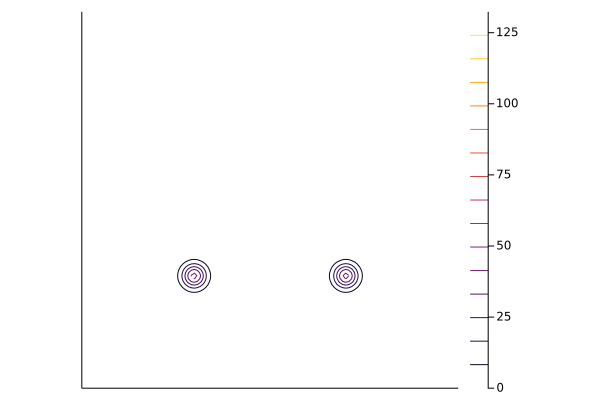

In [13]:
contour(rho_init[:, :, 1]; aspectratio=:equal, ticks=false, clim=lims)
xlims!(1, resol)

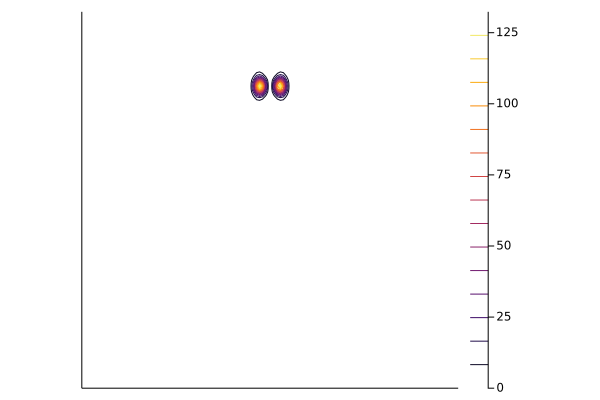

In [14]:
contour(rho_last[:, :, 1]; aspectratio=:equal, ticks=false, clim=lims)
xlims!(1, resol)

In [15]:
anim = @animate for i in 1:length(output_times)
    rho_box = npzread("$(output_config.directory)/rho_$i.npy");
    contour(
        rho_box[:, :, 1];
        aspectratio=:equal,
        clims=lims,
        axis=([], false),
        colorbar=:none,
        title="\$t=$(output_times[i])\$",
    )
end;

┌ Info: Saved animation to 
│   fn = /home/nathan/.julia/dev/UltraDark/examples/tmp.gif
└ @ Plots /home/nathan/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/nathan/.julia/dev/UltraDark/examples/tmp.gif")
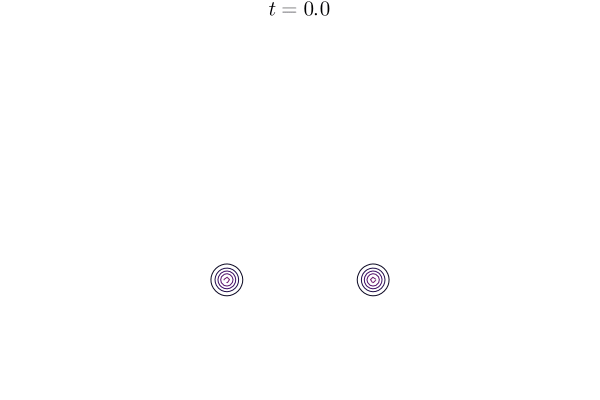

In [16]:
gif(anim, fps=10)